# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [2]:
import numpy as np
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [3]:
employee = pd.read_csv('data\Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with groupby and the other way is with pivot tables. Do it both ways. 


In [4]:
employee_grupby = employee.groupby('Department')['Salary'].mean().reset_index()
employee_grupby


,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


In [5]:
employee_pivot = employee.pivot_table(values="Salary", index="Department")
employee_pivot

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [6]:
employee_pivot2 = employee.pivot_table(values="Salary", index=["Department",], columns='Title')
employee_pivot2

Title,VP,analyst,associate
Department,,,
HR,70.0,32.5,NaN
IT,70.0,32.5,60.0
Sales,NaN,NaN,55.0


#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [7]:
employee_pivot3 = employee.pivot_table(values="Salary", index='Title', columns='Years', aggfunc=np.mean)
employee_pivot3

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [8]:
employee_pivot4 = employee.pivot_table(
    values=["Salary", "Name"],
    index=["Department", "Title"],
    aggfunc={"Salary": "mean", "Name": "count"},
)
employee_pivot4

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [9]:
employee_pivot5 = employee.pivot_table(
    values=["Salary",],
    index=["Department", "Title"],
    aggfunc={"Salary": (np.median,np.min,np.max,np.std)},
)
employee_pivot5

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70       NaN
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60       NaN
Sales      associate     55   55.0  55  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [10]:
employee_pivot5 = employee.pivot_table(
    values=["Salary",],
    index=["Department", "Title"],
    aggfunc={"Salary": (np.median,np.min,np.max,np.std)},
    fill_value=0
)
employee_pivot5

Salary                     
                        max median min       std
Department Title                                
HR         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
IT         VP            70   70.0  70  0.000000
           analyst       35   32.5  30  3.535534
           associate     60   60.0  60  0.000000
Sales      associate     55   55.0  55  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [11]:
employee_pivot6 = employee.pivot_table(
    values=["Salary", "Name"],
    index=["Department",],
    aggfunc={"Salary": (np.sum), "Name": "count"},
).rename(columns={'Name':'Employees'})
employee_pivot6

,Employees,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [12]:
employee_pivot7 = employee.pivot_table(
    values=['Years',"Salary"],
    index=["Department",'Title'],
    aggfunc={"Years": "sum","Salary": (np.mean),},
)

employee_pivot7


Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [13]:
employee_pivot_bonus = employee.pivot_table(
    values="Salary",
    index="Department",
    aggfunc=lambda x: x[x < x.max()].mean() if len(x.unique()) > 1 else x.unique()[0],
)

employee_pivot_bonus

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [14]:
fitbit = pd.read_csv('data\Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [15]:
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [16]:
fitbit.describe

<bound method NDFrame.describe of            Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0    08-05-2015            1934    905      0.65       0              1.355   
1    09-05-2015            3631  18925     14.11       4            611.000   
2    10-05-2015            3204  14228     10.57       1            602.000   
3    11-05-2015            2673   6756      5.02       8            749.000   
4    12-05-2015            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  03-05-2016            3796  18588     14.13      16            599.000   
363  04-05-2016            3525  16382     12.39      16            684.000   
364  05-05-2016            3649  21913     16.40      19            701.000   
365  06-05-2016            3539  19023     14.79      15            575.000   
366  07-05-2016             304   9526      7.08       2            564.000   

     Minutes Ligh

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [45]:
steps_minutes_active = fitbit[['Steps', 'Minutes Very Active']]

steps_minutes_active.corr()

,Steps,Minutes Very Active
Steps,1.000000,0.571452
Minutes Very Active,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

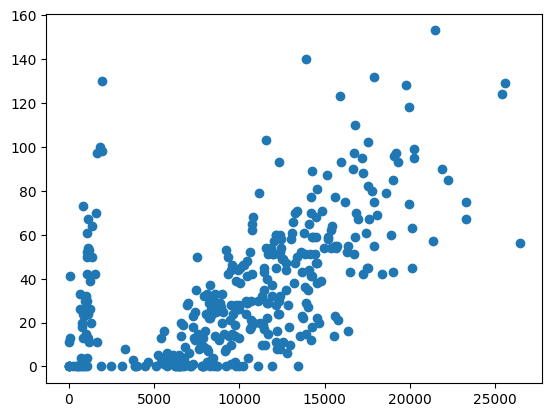

In [46]:
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Very Active'])

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your answer here

# We can say that here its a correlation but its not very confident because the ratio its 0,57 and values since 0 and 0.5 are not thact exact

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [58]:
steps_minutes_sedentary = fitbit[['Steps', 'Minutes Sedentary']]
steps_minutes_sedentary.corr()

,Steps,Minutes Sedentary
Steps,1.000000,0.076906
Minutes Sedentary,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

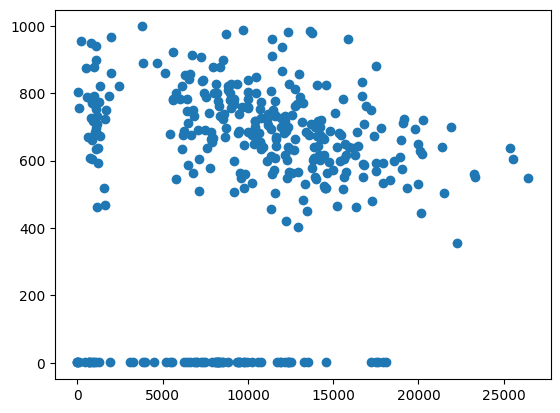

In [54]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['Minutes Sedentary'])

# there is no correlation the points are very dispersed vy far

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [60]:
steps_MinutesOfSleep = fitbit[['Steps', 'MinutesOfSleep']]
steps_MinutesOfSleep.corr()


,Steps,MinutesOfSleep
Steps,1.000000,0.130986
MinutesOfSleep,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

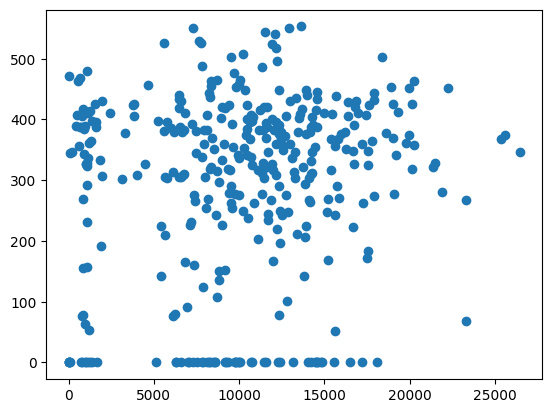

In [61]:
# your answer here
plt.scatter(x=fitbit['Steps'], y=fitbit['MinutesOfSleep'])

# There are no correlaation in this 2 variables

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [71]:
# your answer here
cor_fit = fitbit[
    [
        "Calorie burned",
        "Steps",
        "Floors",
        "Minutes Sedentary",
        "Minutes Very Active",
        "MinutesOfSleep",
    ]
]
cor_fit.corr()

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [25]:
# your answer here
# The highly correlated feautres with the Steps Variable are the Minutes very Active and its folowed by floors and calorie burned

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [83]:
# your answer here
time_grades = pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

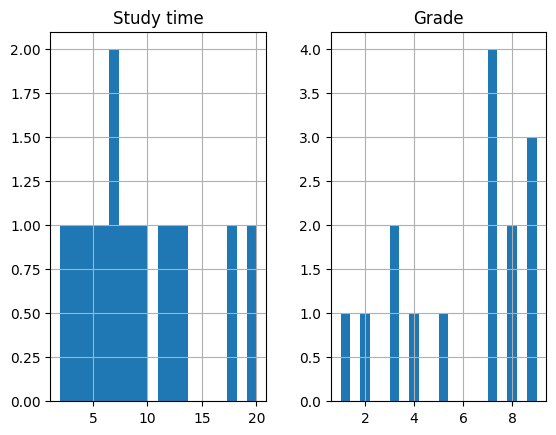

In [87]:
# your answer here
time_grades.hist(bins=20)

plt.show()

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [93]:
# your answer here

# Calculate Pearson correlation
pearson_corr = time_grades['Grade'].corr(time_grades['Study time'], method='pearson')

# Calculate Spearman correlation
spearman_corr = time_grades['Grade'].corr(time_grades['Study time'], method='spearman')

print("Pearson correlation:", pearson_corr)
print("Spearman correlation:", spearman_corr)




Pearson correlation: 0.7980456073578858
Spearman correlation: 0.819658753036942


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

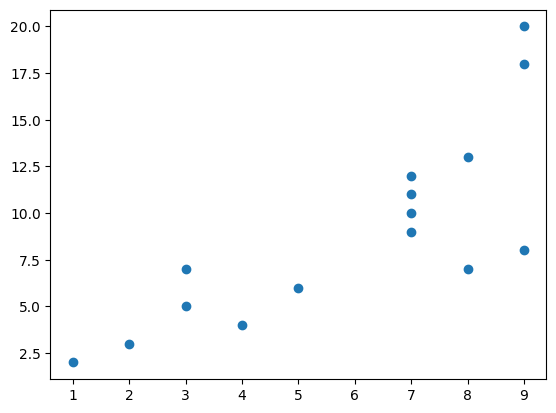

In [97]:
# your answer here
plt.scatter(x=time_grades['Grade'], y=time_grades['Study time'])
plt.show()
# There are a clearly linear correlation

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [30]:
# your answer here
# The diferences for Pearson and Spearman its Pearson are linear correlation and spearman its no linear correlation